In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [4]:
%matplotlib inline

In [5]:
df=pd.read_csv('Reviews.csv')
df=df[:5000]

In [6]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


In [8]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2500.500000,1.580200,2.067200,4.150400,1.294930e+09
std,1443.520003,5.584533,6.288672,1.326549,4.802063e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,1250.750000,0.000000,0.000000,4.000000,1.271376e+09
50%,2500.500000,0.000000,1.000000,5.000000,1.309219e+09
75%,3750.250000,2.000000,2.000000,5.000000,1.330301e+09
max,5000.000000,187.000000,216.000000,5.000000,1.351210e+09


In [9]:
df.isnull()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


In [10]:
print(df.shape)

(5000, 10)


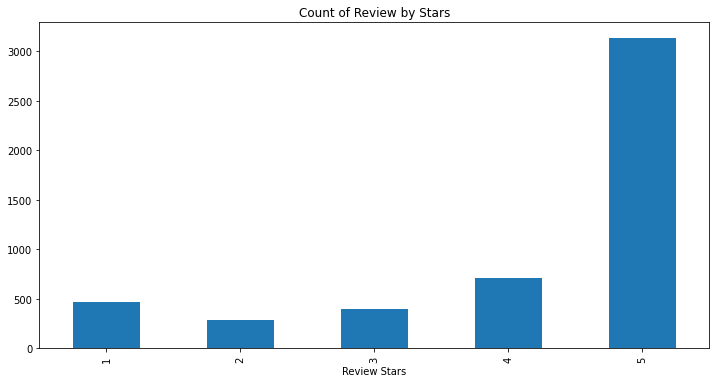

In [11]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',
                                              title='Count of Review by Stars',
                                              figsize=(12,6))
ax.set_xlabel('Review Stars')
plt.show()

# VADER sentiment scoring







In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [13]:
sia=SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores('I am Happy')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [15]:
example=df['Text'][50]

In [16]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [17]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [18]:
dic={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    id=row['Id']
    dic[id]=sia.polarity_scores(text)


  0%|          | 0/5000 [00:00<?, ?it/s]

In [19]:
pd.DataFrame(dic)

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.1150,0.0000,0.080,0.0250,0.0260,0.0970,0.1540,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.5650,0.8180,0.8480,0.6790,0.692,0.8830,0.7640,0.8270,0.6370,0.7170
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.4350,0.1820,0.0370,0.3210,0.228,0.0920,0.2100,0.0760,0.2090,0.2830
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9531,0.7177,-0.8264,0.9693,0.792,0.7193,0.9846,-0.0554,0.9078,0.9923


In [20]:
new_df=pd.DataFrame(dic).T
new_df

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
4996,0.025,0.883,0.092,0.7193
4997,0.026,0.764,0.210,0.9846
4998,0.097,0.827,0.076,-0.0554
4999,0.154,0.637,0.209,0.9078


In [21]:
new_df=new_df.reset_index().rename(columns={'Index':'Id	'})
new_df

,index,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193
4996,4997,0.026,0.764,0.210,0.9846
4997,4998,0.097,0.827,0.076,-0.0554
4998,4999,0.154,0.637,0.209,0.9078


In [22]:
new_df

,index,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193
4996,4997,0.026,0.764,0.210,0.9846
4997,4998,0.097,0.827,0.076,-0.0554
4998,4999,0.154,0.637,0.209,0.9078


In [23]:
result = pd.concat([new_df, df], axis=1)
# result = pd.concat([df1, df4], axis=1)

In [24]:
result

,index,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193,4996,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,0.026,0.764,0.210,0.9846,4997,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,0.097,0.827,0.076,-0.0554,4998,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,0.154,0.637,0.209,0.9078,4999,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


In [25]:
new_result=result.drop('index',axis=1)

In [26]:
new_result

,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,0.091,0.754,0.155,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,0.000,1.000,0.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,0.000,0.552,0.448,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.025,0.883,0.092,0.7193,4996,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,0.026,0.764,0.210,0.9846,4997,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,0.097,0.827,0.076,-0.0554,4998,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,0.154,0.637,0.209,0.9078,4999,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


C:\Users\bhask\AppData\Local\Temp\ipykernel_20984\3686845163.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=new_result,x='Score',y='compound',palette='coolwarm')


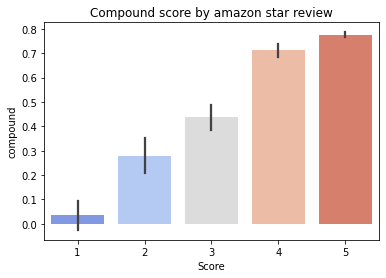

In [27]:
ax=sns.barplot(data=new_result,x='Score',y='compound',palette='coolwarm')
ax.set_title('Compound score by amazon star review')
plt.show()

C:\Users\bhask\AppData\Local\Temp\ipykernel_20984\1716734848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_result,x='Score',y='pos',palette='coolwarm',ax=axis[0])
C:\Users\bhask\AppData\Local\Temp\ipykernel_20984\1716734848.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_result,x='Score',y='neg',palette='coolwarm',ax=axis[1])
C:\Users\bhask\AppData\Local\Temp\ipykernel_20984\1716734848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_result,x='Score',y='neu',palette='coolwarm',ax=axis[2])


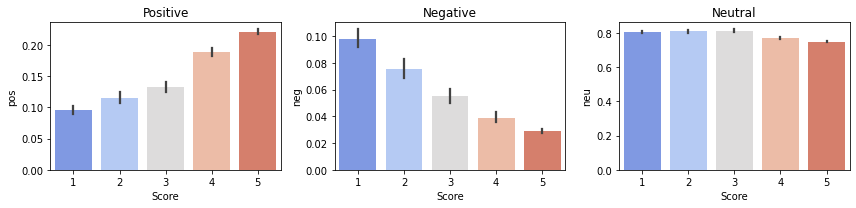

In [28]:
fig,axis=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=new_result,x='Score',y='pos',palette='coolwarm',ax=axis[0])
sns.barplot(data=new_result,x='Score',y='neg',palette='coolwarm',ax=axis[1])
sns.barplot(data=new_result,x='Score',y='neu',palette='coolwarm',ax=axis[2])
axis[0].set_title('Positive')
axis[1].set_title('Negative')
axis[2].set_title('Neutral')
plt.tight_layout()
plt.show()

#  Roberta Pretrained Model 

In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification 
from scipy.special import softmax

In [30]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\bhask\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [31]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [32]:
# Run for Roberta Model
tokenize_text=tokenizer(example,return_tensors='pt')
output=model(**tokenize_text)

In [33]:
scores=output[0][0].detach().numpy()
scores

array([ 3.1436293, -0.7106689, -2.6558964], dtype=float32)

In [34]:
# Range of softmax 0 to 1
scores=softmax(scores)
scores

array([0.97635514, 0.02068747, 0.00295737], dtype=float32)

In [35]:
scores_dict={
    'Roberta_pos':scores[2],
    'Roberta_neutral':scores[1],
    'Roberta_neg':scores[0]
    
}
print(scores_dict)

{'Roberta_pos': 0.0029573706, 'Roberta_neutral': 0.02068747, 'Roberta_neg': 0.97635514}


# Combine and Compare


In [36]:
def Roberta_polarity_score(example):
    tokenize_text=tokenizer(example,return_tensors='pt')
    output=model(**tokenize_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
    'Roberta_pos':scores[2],
    'Roberta_neutral':scores[1],
    'Roberta_neg':scores[0] 
    }
    return scores_dict

In [37]:
# Running the polarity score on the entire dataset
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    try:
        
        text=row['Text']
        id=row['Id']
        vader_result=sia.polarity_scores(text)
        Roberto_result=Roberta_polarity_score(text)
        both={**vader_result,**Roberto_result}
        res[id]=both
        
    except RuntimeError:
        print(f'Broke for Id {id}')
        


  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for Id 83
Broke for Id 187
Broke for Id 529
Broke for Id 540
Broke for Id 746
Broke for Id 863
Broke for Id 1053
Broke for Id 1070
Broke for Id 1156
Broke for Id 1321
Broke for Id 1375
Broke for Id 1498
Broke for Id 1575
Broke for Id 1796
Broke for Id 1826
Broke for Id 2169
Broke for Id 2248
Broke for Id 2476
Broke for Id 2492
Broke for Id 2584
Broke for Id 2610
Broke for Id 2897
Broke for Id 2898
Broke for Id 2902
Broke for Id 2928
Broke for Id 2942
Broke for Id 2944
Broke for Id 2947
Broke for Id 2948
Broke for Id 3022
Broke for Id 3023
Broke for Id 3025
Broke for Id 3306
Broke for Id 3788
Broke for Id 3969
Broke for Id 4107
Broke for Id 4110
Broke for Id 4307
Broke for Id 4316
Broke for Id 4408
Broke for Id 4483
Broke for Id 4512
Broke for Id 4553
Broke for Id 4583


In [40]:
combine_result=pd.DataFrame(res).T
combine_result

,neg,neu,pos,compound,Roberta_pos,Roberta_neutral,Roberta_neg
1,0.000,0.695,0.305,0.9441,0.940395,0.049980,0.009624
2,0.138,0.862,0.000,-0.5664,0.038600,0.452414,0.508986
3,0.091,0.754,0.155,0.8265,0.898704,0.098067,0.003229
4,0.000,1.000,0.000,0.0000,0.907486,0.090219,0.002295
5,0.000,0.552,0.448,0.9468,0.988063,0.010302,0.001635
...,...,...,...,...,...,...,...
4996,0.025,0.883,0.092,0.7193,0.599604,0.300059,0.100337
4997,0.026,0.764,0.210,0.9846,0.888035,0.092043,0.019922
4998,0.097,0.827,0.076,-0.0554,0.063164,0.333857,0.602979
4999,0.154,0.637,0.209,0.9078,0.943743,0.044735,0.011522


In [41]:
combine_result=combine_result.reset_index().rename(columns={'Index':'Id	'})
combine_result

,index,neg,neu,pos,compound,Roberta_pos,Roberta_neutral,Roberta_neg
0,1,0.000,0.695,0.305,0.9441,0.940395,0.049980,0.009624
1,2,0.138,0.862,0.000,-0.5664,0.038600,0.452414,0.508986
2,3,0.091,0.754,0.155,0.8265,0.898704,0.098067,0.003229
3,4,0.000,1.000,0.000,0.0000,0.907486,0.090219,0.002295
4,5,0.000,0.552,0.448,0.9468,0.988063,0.010302,0.001635
...,...,...,...,...,...,...,...,...
4951,4996,0.025,0.883,0.092,0.7193,0.599604,0.300059,0.100337
4952,4997,0.026,0.764,0.210,0.9846,0.888035,0.092043,0.019922
4953,4998,0.097,0.827,0.076,-0.0554,0.063164,0.333857,0.602979
4954,4999,0.154,0.637,0.209,0.9078,0.943743,0.044735,0.011522


In [42]:
final_res=pd.concat([combine_result,df],axis=1)

In [43]:
final_res

,index,neg,neu,pos,compound,Roberta_pos,Roberta_neutral,Roberta_neg,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,0.000,0.695,0.305,0.9441,0.940395,0.049980,0.009624,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,0.138,0.862,0.000,-0.5664,0.038600,0.452414,0.508986,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,0.091,0.754,0.155,0.8265,0.898704,0.098067,0.003229,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,0.000,1.000,0.000,0.0000,0.907486,0.090219,0.002295,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,0.000,0.552,0.448,0.9468,0.988063,0.010302,0.001635,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4996,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4997,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4998,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4999,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


In [44]:
final_res.columns

Index(['index', 'neg', 'neu', 'pos', 'compound', 'Roberta_pos',
       'Roberta_neutral', 'Roberta_neg', 'Id', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

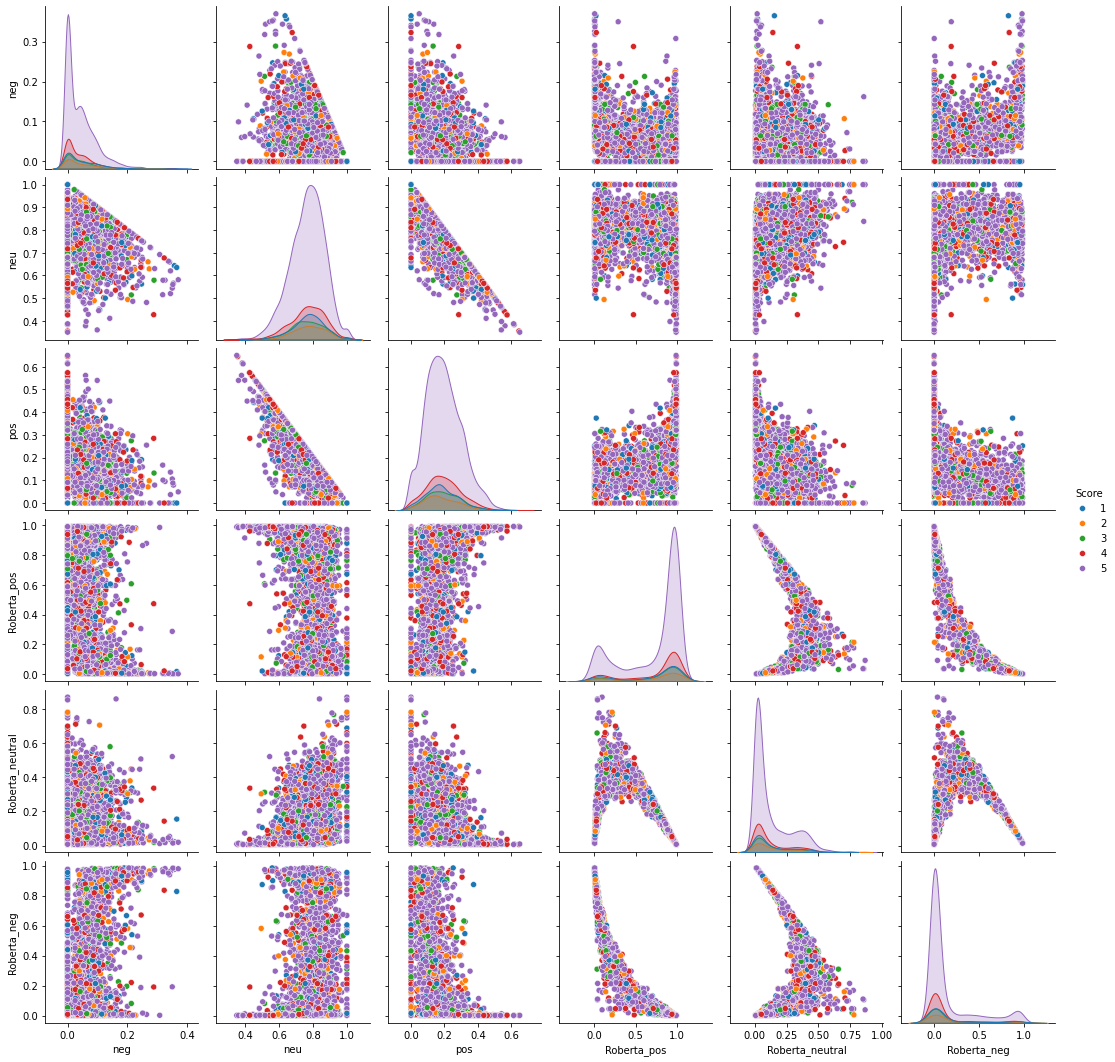

In [45]:
# compare scores between models
sns.pairplot(data=final_res,vars=['neg', 'neu', 'pos','Roberta_pos',
       'Roberta_neutral', 'Roberta_neg'],hue='Score',palette='tab10')
plt.show()

# The Transformer Pipeline

In [46]:
from transformers import pipeline

In [47]:
sent_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\bhask\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [48]:
sent_pipeline('I not like this movie')

[{'label': 'NEGATIVE', 'score': 0.9828657507896423}]

In [49]:
sent_pipeline('Food was not good')

[{'label': 'NEGATIVE', 'score': 0.9996418952941895}]

In [50]:
sent_pipeline('I do like you')

[{'label': 'POSITIVE', 'score': 0.999871015548706}]

In [51]:
sent_pipeline('Movie was ok')

[{'label': 'POSITIVE', 'score': 0.9997630715370178}]